## Day25

In [1]:
## importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
ball_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Ball_by_Ball.csv")
match_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Match.csv")
player_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Player.csv")
player_match_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Player_Match.csv")
season_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Season.csv")
team_data = pd.read_csv(r"C:\Users\dell\Itronix\Datasets\Team.csv")

### Number of Matches in Each Stadium

In [121]:
m = match_data.loc[:,"Venue_Name"]
m = pd.DataFrame(m)
m= m.groupby("Venue_Name",as_index=False)
m = m[["Venue_Name"]].agg(['count']).rename(columns={'count': 'Matches'})
m.columns = m.columns.droplevel(0)
print(m)
# print(m)
# print(type(m))
# m = 

                                                    Matches
Venue_Name                                                 
Barabati Stadium                                          7
Brabourne Stadium                                        11
Buffalo Park                                              3
De Beers Diamond Oval                                     3
Dr DY Patil Sports Academy                               17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...       11
Dubai International Cricket Stadium                       7
Eden Gardens                                             54
Feroz Shah Kotla                                         53
Green Park                                                2
Himachal Pradesh Cricket Association Stadium              9
Holkar Cricket Stadium                                    2
JSCA International Stadium Complex                        7
Kingsmead                                                15
M Chinnaswamy Stadium                   

## Man Of the Match

In [163]:
winner = match_data.loc[:,["Match_Date","Season_Id","Match_Winner_Id"]]
winner = winner.groupby("Season_Id",as_index = False)
temp = team_data.loc[:,["Team_Id","Team_Name"]]

In [176]:
for i,j in winner:
    
    w = int(winner.get_group(i).iloc[-1,2])
    print("Winner of Season ",i,":",w," ",temp.iloc[w-1,1])


Winner of Season  1 : 5   Rajasthan Royals
Winner of Season  2 : 8   Deccan Chargers
Winner of Season  3 : 3   Chennai Super Kings
Winner of Season  4 : 3   Chennai Super Kings
Winner of Season  5 : 1   Kolkata Knight Riders
Winner of Season  6 : 7   Mumbai Indians
Winner of Season  7 : 1   Kolkata Knight Riders
Winner of Season  8 : 7   Mumbai Indians
Winner of Season  9 : 11   Sunrisers Hyderabad


## Man of the Match Count By Players

In [226]:
motm = pd.DataFrame(match_data["Man_Of_The_Match_Id"])
motm = motm.groupby("Man_Of_The_Match_Id")["Man_Of_The_Match_Id"].count().sort_values(ascending = False)

In [227]:
print(motm)

Man_Of_The_Match_Id
162.0    17
31.0     16
110.0    15
187.0    14
21.0     13
57.0     13
20.0     12
19.0     12
85.0     12
40.0     12
8.0      11
41.0     11
147.0    10
9.0      10
32.0     10
100.0     9
136.0     9
133.0     8
221.0     8
35.0      7
53.0      7
334.0     6
232.0     6
73.0      6
185.0     6
104.0     6
50.0      6
208.0     6
1.0       5
46.0      5
         ..
125.0     1
131.0     1
132.0     1
135.0     1
137.0     1
144.0     1
149.0     1
157.0     1
161.0     1
458.0     1
178.0     1
183.0     1
186.0     1
188.0     1
191.0     1
192.0     1
196.0     1
197.0     1
201.0     1
207.0     1
210.0     1
211.0     1
214.0     1
216.0     1
223.0     1
224.0     1
230.0     1
231.0     1
233.0     1
175.0     1
Name: Man_Of_The_Match_Id, Length: 187, dtype: int64


## Second Method

In [245]:
motm = pd.DataFrame(match_data["Man_Of_The_Match_Id"])
motm = motm.groupby("Man_Of_The_Match_Id")
l = []
for i,j in motm:
    l.append([i,player_data.iloc[int(i),1],len(j)])
    

In [246]:
l = pd.DataFrame(l,columns=["Player Id","Player Name","MOTM WON"])

In [251]:
l = l.sort_values(by="MOTM WON",ascending=False)
l.head(n=5)

,Player Id,Player Name,MOTM WON
90,162.0,MC Henriques,17
21,31.0,SR Watson,16
67,110.0,LPC Silva,15
98,187.0,RJ Harris,14
36,57.0,SB Styris,13


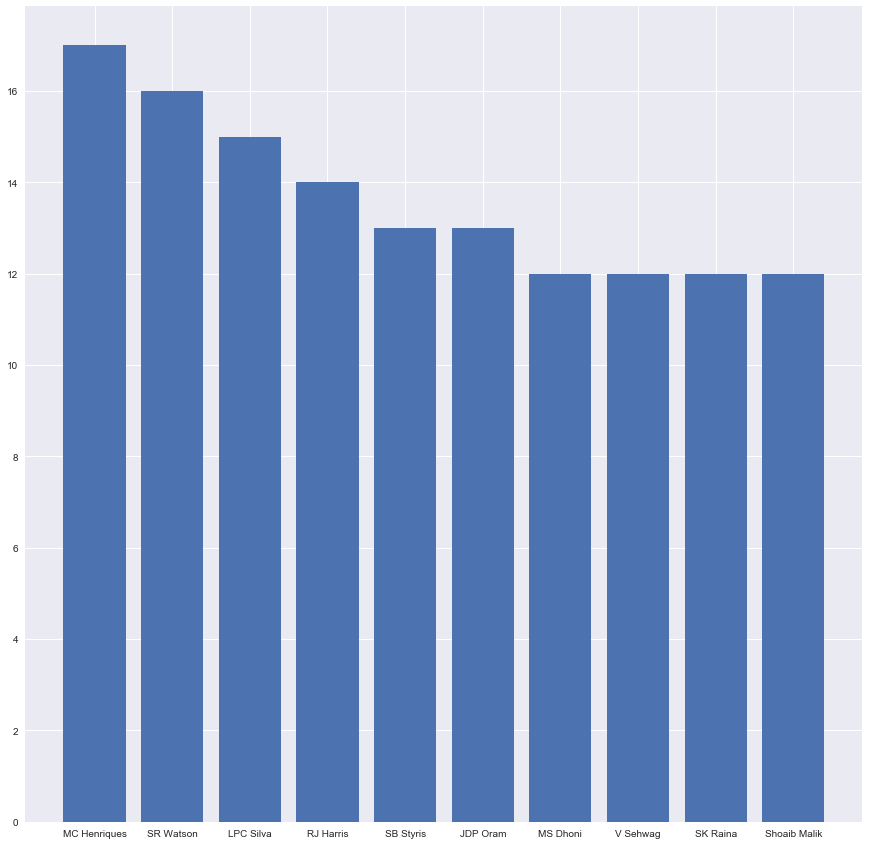

In [253]:
plt.style.use("seaborn")
plt.figure(figsize=(15,15))
plt.bar(l.iloc[:10,1],l.iloc[:10,2])
plt.show()

99
